In [1]:
!pip install wordcloud
!pip install plotly
!pip install nbformat ipywidgets jupyterlab



Dataset Overview:
Shape: (112, 4)
Columns: ['question', 'answer', 'category', 'difficulty']

First few rows:
                                question  \
0           What is women's empowerment?   
1        What does gender equality mean?   
2     Why is girls' education important?   
3  How can we support women's education?   
4            What is the gender pay gap?   

                                              answer        category  \
0  Women's empowerment refers to the process of g...  basic_concepts   
1  Gender equality means that all individuals, re...  basic_concepts   
2  Educating girls is crucial because it leads to...       education   
3  You can support women's education by donating ...       education   
4  The gender pay gap refers to the difference in...       workplace   

     difficulty  
0      beginner  
1      beginner  
2  intermediate  
3  intermediate  
4  intermediate  

Basic Statistics:
                            question  \
count                     

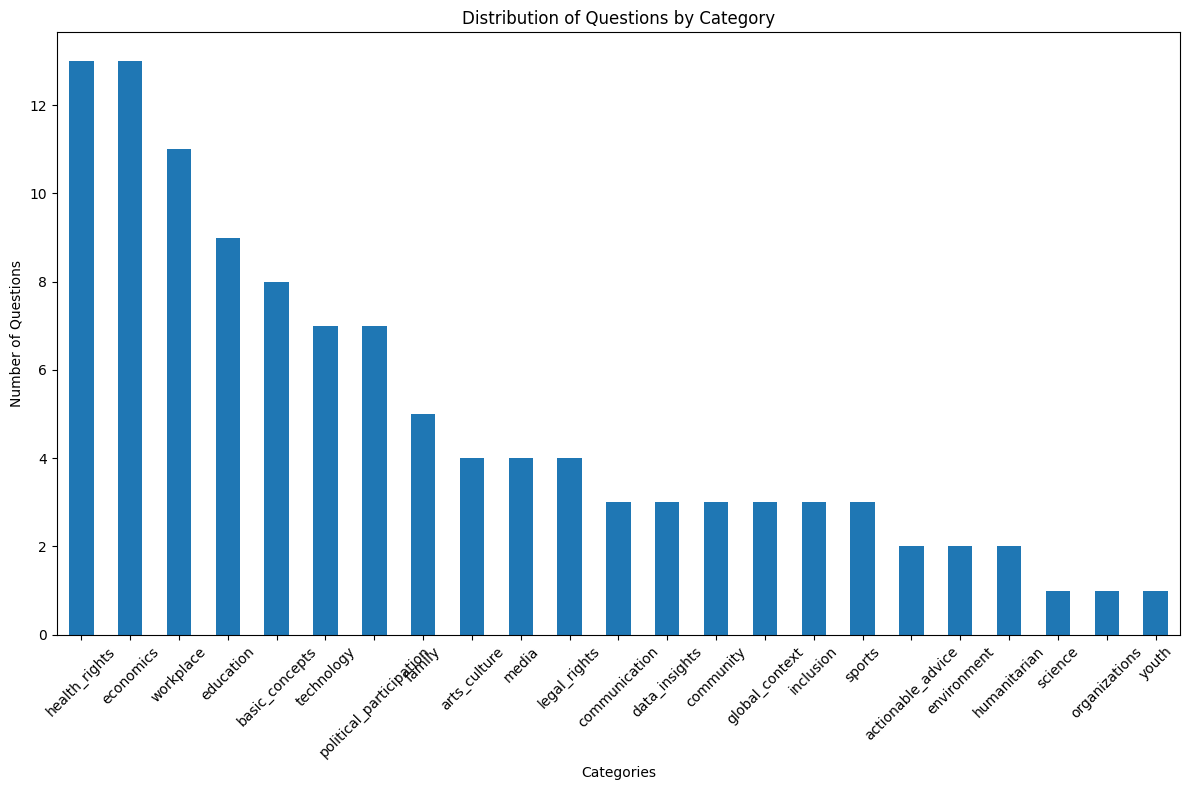


Text Length Analysis:
Average question length: 39.19 characters
Average answer length: 246.96 characters
Max question length: 68 characters
Max answer length: 294 characters

Top 10 words in questions:
[('what', 57), ('how', 53), ('is', 51), ('can', 50), ('we', 46), ('women', 41), ('gender', 32), ('the', 32), ('in', 29), ('s', 22)]

Top 10 words in answers:
[('and', 212), ('women', 128), ('gender', 84), ('in', 78), ('to', 76), ('by', 61), ('s', 60), ('can', 58), ('that', 50), ('the', 46)]


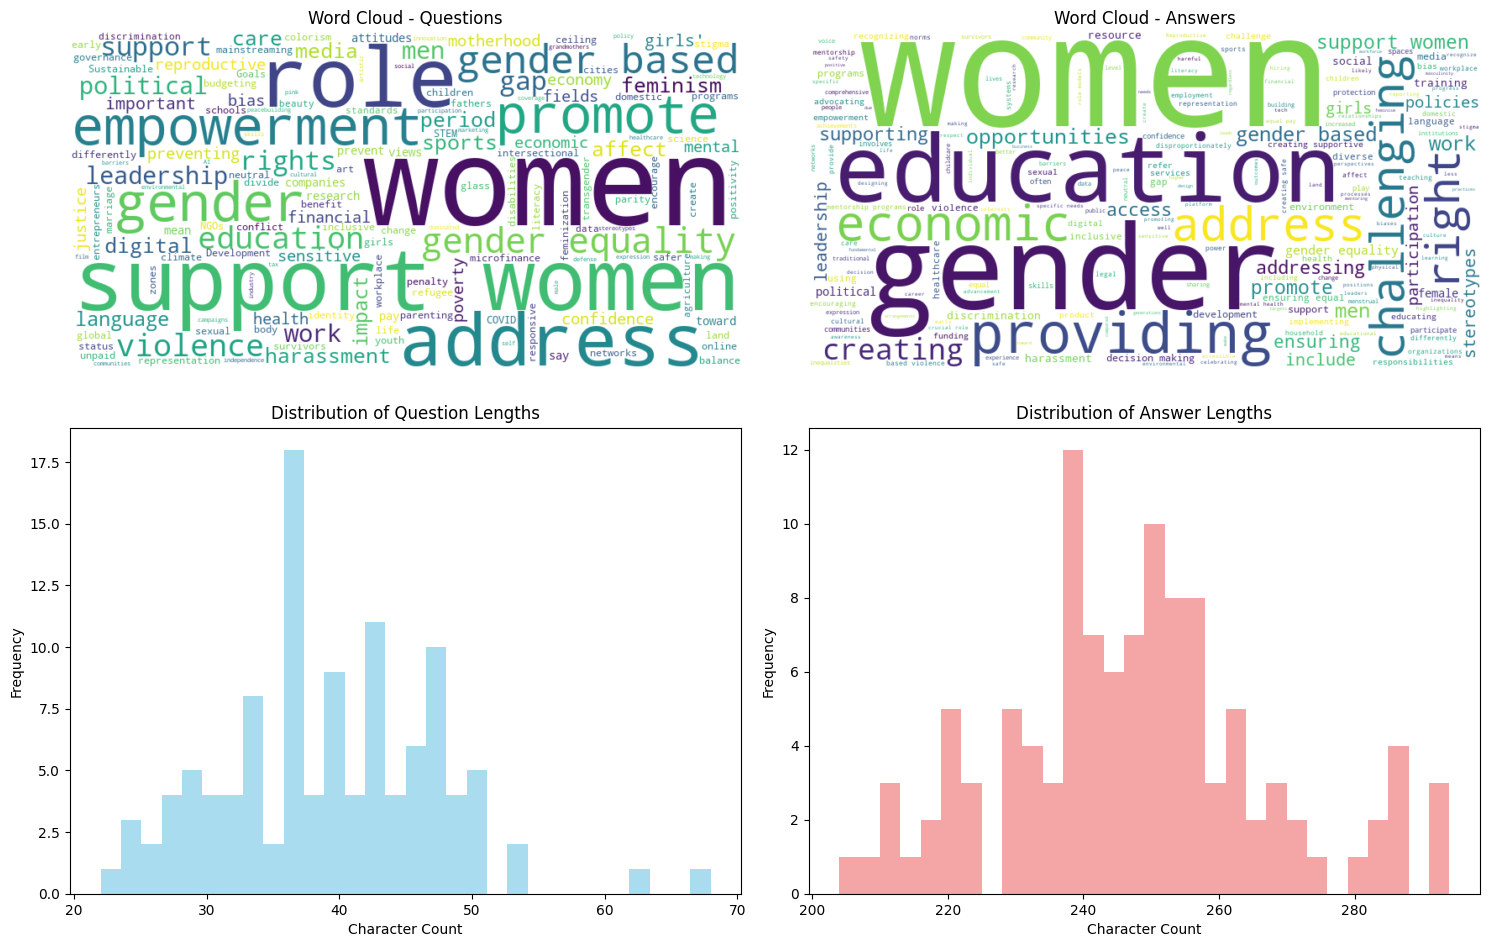


Category-wise Analysis:

basic_concepts:
  Number of questions: 8
  Sample questions: ["What is women's empowerment?", 'What does gender equality mean?', 'What is gender mainstreaming?']

education:
  Number of questions: 9
  Sample questions: ["Why is girls' education important?", "How can we support women's education?", 'How can we encourage girls in STEM fields?']

workplace:
  Number of questions: 11
  Sample questions: ['What is the gender pay gap?', 'How can companies promote gender equality?', 'What is the glass ceiling?']

health_rights:
  Number of questions: 13
  Sample questions: ['What are reproductive rights?', 'How can we prevent gender-based violence?', 'What is gender-based violence?']

data_insights:
  Number of questions: 3
  Sample questions: ['What does research say about attitudes toward gender-based violence?', "How does education affect views on women's rights?", 'What is the role of data in gender equality?']

actionable_advice:
  Number of questions: 2
  Sampl

In [2]:
# notebooks/data_analysis.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from collections import Counter
import re

# Load the dataset
df = pd.read_csv('../dataset/womenchatbot.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())
print(f"\nMissing values:\n{df.isnull().sum()}")

# Data Quality Analysis
print("\nData Quality Analysis:")
print(f"Total Q&A pairs: {len(df)}")
print(f"Unique categories: {df['category'].nunique()}")
print(f"Categories: {df['category'].unique().tolist()}")

# Category distribution
category_counts = df['category'].value_counts()
print(f"\nCategory Distribution:\n{category_counts}")

# Visualization 1: Category Distribution
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Distribution of Questions by Category')
plt.xlabel('Categories')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Text Analysis
def analyze_text_lengths(df):
    df['question_length'] = df['question'].str.len()
    df['answer_length'] = df['answer'].str.len()
    
    print("\nText Length Analysis:")
    print(f"Average question length: {df['question_length'].mean():.2f} characters")
    print(f"Average answer length: {df['answer_length'].mean():.2f} characters")
    print(f"Max question length: {df['question_length'].max()} characters")
    print(f"Max answer length: {df['answer_length'].max()} characters")
    
    return df

df = analyze_text_lengths(df)

# Word Frequency Analysis
def get_word_frequencies(text_series):
    all_text = ' '.join(text_series.astype(str))
    words = re.findall(r'\b\w+\b', all_text.lower())
    return Counter(words)

question_words = get_word_frequencies(df['question'])
answer_words = get_word_frequencies(df['answer'])

print("\nTop 10 words in questions:")
print(question_words.most_common(10))

print("\nTop 10 words in answers:")
print(answer_words.most_common(10))

# Word Cloud for Questions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['question']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Questions')

plt.subplot(2, 2, 2)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['answer']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Answers')

plt.subplot(2, 2, 3)
plt.hist(df['question_length'], bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of Question Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['answer_length'], bins=30, alpha=0.7, color='lightcoral')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Interactive category distribution with Plotly
fig = px.pie(values=category_counts.values, 
             names=category_counts.index, 
             title='Topic Distribution in Women Empowerment Dataset')
fig.show()

# Category-wise analysis
print("\nCategory-wise Analysis:")
for category in df['category'].unique():
    category_data = df[df['category'] == category]
    print(f"\n{category}:")
    print(f"  Number of questions: {len(category_data)}")
    print(f"  Sample questions: {category_data['question'].head(3).tolist()}")

# Data Quality Checks
def check_data_quality(df):
    issues = []
    
    # Check for empty questions/answers
    empty_questions = df[df['question'].str.strip() == '']
    empty_answers = df[df['answer'].str.strip() == '']
    
    if len(empty_questions) > 0:
        issues.append(f"Found {len(empty_questions)} empty questions")
    
    if len(empty_answers) > 0:
        issues.append(f"Found {len(empty_answers)} empty answers")
    
    # Check for duplicates
    duplicate_questions = df[df.duplicated('question')]
    if len(duplicate_questions) > 0:
        issues.append(f"Found {len(duplicate_questions)} duplicate questions")
    
    return issues

quality_issues = check_data_quality(df)
print("\nData Quality Issues:")
for issue in quality_issues:
    print(f"  - {issue}")

# Save analysis results
analysis_results = {
    'total_samples': len(df),
    'total_categories': df['category'].nunique(),
    'avg_question_length': df['question_length'].mean(),
    'avg_answer_length': df['answer_length'].mean(),
    'category_distribution': category_counts.to_dict(),
    'quality_issues': quality_issues
}

print("\nAnalysis Summary:")
for key, value in analysis_results.items():
    if key != 'category_distribution' and key != 'quality_issues':
        print(f"{key}: {value}")